In [170]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='560a9dde-8fce-46db-9e04-55ec6a412865', project_access_token='p-95fa92f4319000ea07af26ae59a966a24cbd252a')
pc = project.project_context


# Applied Data Science Specialization Capstone

This notebook shows the process for completing the capstone project for the Applied Data Science Specialization Capstone course issued by Coursera in conjunction with IBM.

https://www.coursera.org/professional-certificates/ibm-data-science

In this assignment, the student must leverage location data using Foursquare API to solve a problem or get deeper insights into a neighborhood's reputation. 

In [237]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn



!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas import json_normalize

! pip install folium==0.5.0
import folium # plotting library

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs


print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [172]:
import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_b15569be60ed466c9b15ebf0e9035db8 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='UwKNNLa4gPtKgG2nIUtAXbvyga2juIl7i5-bx9emKEYa',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_b15569be60ed466c9b15ebf0e9035db8.get_object(Bucket='ibmtest-donotdelete-pr-l1yyerq4ojmik8',Key='8358_1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

pizza_df = pd.read_csv(body)
pizza_df.head()


,id,address,categories,city,country,keys,latitude,longitude,menuPageURL,menus.amountMax,...,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province
0,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,22.50,...,USD,2016-03-31T02:19:42Z,NaN,Bianca Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR
1,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,18.95,...,USD,2016-03-31T02:19:42Z,NaN,Cheese Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR
2,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,12.00,...,USD,2015-10-23T03:57:26Z,NaN,"Pizza, Margherita",The Brentwood,90049,USD,50.0,55.0,Brentwood
3,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,13.00,...,USD,2015-10-23T03:57:26Z,NaN,"Pizza, Mushroom",The Brentwood,90049,USD,50.0,55.0,Brentwood
4,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,13.00,...,USD,2015-10-23T03:57:26Z,"Olives, onions, capers, tomatoes","Pizza, Puttenesca",The Brentwood,90049,USD,50.0,55.0,Brentwood


In [173]:
pizza_all = pizza_df
pizza_all.head()



,id,address,categories,city,country,keys,latitude,longitude,menuPageURL,menus.amountMax,...,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province
0,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,22.50,...,USD,2016-03-31T02:19:42Z,NaN,Bianca Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR
1,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,18.95,...,USD,2016-03-31T02:19:42Z,NaN,Cheese Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR
2,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,12.00,...,USD,2015-10-23T03:57:26Z,NaN,"Pizza, Margherita",The Brentwood,90049,USD,50.0,55.0,Brentwood
3,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,13.00,...,USD,2015-10-23T03:57:26Z,NaN,"Pizza, Mushroom",The Brentwood,90049,USD,50.0,55.0,Brentwood
4,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,13.00,...,USD,2015-10-23T03:57:26Z,"Olives, onions, capers, tomatoes","Pizza, Puttenesca",The Brentwood,90049,USD,50.0,55.0,Brentwood


In [174]:
pizza_all = pizza_all.drop(['keys','menuPageURL','country','menus.amountMax','menus.currency','menus.dateSeen','priceRangeCurrency','menus.amountMin','address','id','menus.description','priceRangeMin','priceRangeMax','province', 'categories', 'postalCode'], axis=1)

pizza_all.rename(columns = {'menus.name': 'Pizza', 'name': 'Restaurant'}, inplace = True)

pizza_all.head()

,city,latitude,longitude,Pizza,Restaurant
0,Bend,44.102665,-121.300797,Bianca Pizza,Little Pizza Paradise
1,Bend,44.102665,-121.300797,Cheese Pizza,Little Pizza Paradise
2,Los Angeles,34.064563,-118.469017,"Pizza, Margherita",The Brentwood
3,Los Angeles,34.064563,-118.469017,"Pizza, Mushroom",The Brentwood
4,Los Angeles,34.064563,-118.469017,"Pizza, Puttenesca",The Brentwood


In [175]:
#project.save_data(file_name = "pizza_refined.csv",data = pizza_all.to_csv(index=False))

In [176]:
pd.value_counts(pizza_all['Restaurant'])

Sicilia's Pizzeria                      96
J & G Restaurant                        55
Casey's General Store                   43
The Pizza Joint                         36
North End Pizzeria                      34
                                        ..
Primo's Pizza                            1
Max Brenner Chocolate Bar                1
Andrea Pizza - Towle Building            1
Buster's Sports Bar and Grill            1
Kimono Japanese & Chinese Restaurant     1
Name: Restaurant, Length: 933, dtype: int64

In [177]:
counts = pd.DataFrame(pd.value_counts(pizza_all['Pizza']))


counts.head(20)

,Pizza
Cheese Pizza,136
White Pizza,75
Margherita Pizza,63
Pizza,62
Hawaiian Pizza,54
Pizza Burger,50
Bbq Chicken Pizza,47
Pepperoni Pizza,44
Buffalo Chicken Pizza,44
Veggie Pizza,34


In [178]:
counts.tail(10)

,Pizza
Cubs Pizza,1
Stuffed Bbq Chicken Pizza,1
Buffalo Chicken Sicilian Pizza,1
St. Elmo Prime Rib Pizza,1
Chicken Stuffed Pizza,1
Vegetable Large Pizza,1
Fresh Tomato and Basil Pizza,1
The Classic Mexican Pizza,1
Raw Pizza,1
Stuffed Pizza (meat),1


In [179]:
!pip install wordcloud

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

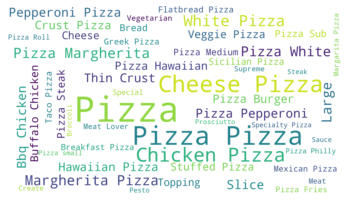

In [180]:
pizza_all['Pizza'] = pizza_all['Pizza'].astype('string')

text = pizza_all['Pizza']

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=200, max_words=50, background_color="white", width=1920, height=1080).generate(' '.join(text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [181]:

body = client_b15569be60ed466c9b15ebf0e9035db8.get_object(Bucket='ibmtest-donotdelete-pr-l1yyerq4ojmik8',Key='data_asset/pizza_final_csv_shaped_cvkytzon94709097gx3bzo8z7')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

pizza_rf = pd.read_csv(body)

pizza_rf.rename(columns = {'menus.name': 'Pizza', 'name': 'Restaurant'}, inplace = True)

pizza_rf.head()


,city,latitude,longitude,Pizza,Restaurant,postalCode
0,Bend,44.102665,-121.300797,Bianca Pizza,Little Pizza Paradise,97701
1,Bend,44.102665,-121.300797,Cheese Pizza,Little Pizza Paradise,97701
2,Los Angeles,34.064563,-118.469017,Margherita Pizza,The Brentwood,90049
3,Los Angeles,34.064563,-118.469017,Mushroom Pizza,The Brentwood,90049
4,Los Angeles,34.064563,-118.469017,"Pizza, Puttenesca",The Brentwood,90049


In [182]:
counts = pd.DataFrame(pd.value_counts(pizza_rf['Pizza']))

counts

,Pizza
Cheese Pizza,288
Chicken Pizza,152
Margherita Pizza,143
Veggie Pizza,141
White Pizza,136
...,...
Pizza Salmone Affumicato,1
Rolled Pizza Bites 10,1
Pizza Chevre,1
Cherry Pie Pizza,1


In [183]:
pizza_gd = pd.get_dummies(pizza_rf, columns=['Pizza'], prefix='', prefix_sep='')

pizza_ingredients = pizza_gd.drop(['latitude','longitude','city','postalCode'], axis=1)

pizza_ingredients

,Restaurant,1 Ingredient Pizza,1 Item Pizza,1 Pizza With The Works,100 Pound Pizza,12 Sweep The Kitchen Pizza,14 Party Pizza,14 Sweep The Kitchen Pizza,15 Pizza Mafia,2 Item Pizza,...,Wild Ranch Pizza,Winter Pizza,Wood Fire Grilled Pizza,Wood Oven Pizza,Works Pizza,Yiayias Pizza,Zbq Pizza,Zesty Garlic Wing Pizza,Zesty Italian Pizza,Zingers Pizza
0,Little Pizza Paradise,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Little Pizza Paradise,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The Brentwood,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Brentwood,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,The Brentwood,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3505,Prison Brews Brewery & Restaurant,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3506,Prison Brews Brewery & Restaurant,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3507,Moonlight Cafe,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3508,Moonlight Cafe,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [184]:
pizza_ingredients_gb = pizza_ingredients.groupby('Restaurant').sum()

pizza_ingredients_gb.head()

,1 Ingredient Pizza,1 Item Pizza,1 Pizza With The Works,100 Pound Pizza,12 Sweep The Kitchen Pizza,14 Party Pizza,14 Sweep The Kitchen Pizza,15 Pizza Mafia,2 Item Pizza,2 Items Pizza,...,Wild Ranch Pizza,Winter Pizza,Wood Fire Grilled Pizza,Wood Oven Pizza,Works Pizza,Yiayias Pizza,Zbq Pizza,Zesty Garlic Wing Pizza,Zesty Italian Pizza,Zingers Pizza
Restaurant,,,,,,,,,,,,,,,,,,,,,
'l Bistro,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24 Hour Express Locksmith Inc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7 Day 24 Hours Emergency Locks,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Abo's Pizza,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Abyssinia Chinese,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [185]:
pizza_ingredients_gb.drop([col for col, val in pizza_ingredients_gb.sum().iteritems() if val < 4], axis=1, inplace=True)

pizza_ingredients_gb

,Baked Ziti Pizza,Bbq Pizza,Blt Pizza,Breakfast Pizza,Broccoli Pizza,Buffalo Pizza,Build your own Pizza,Burger Pizza,California Pizza,Caprese Pizza,...,Supreme Pizza,Sushi Pizza,Taco Pizza,Thai Dye Pizza,The Everything Pizza,Thin Pizza,Traditional Pizza,Veal Pizzaiola,Veggie Pizza,White Pizza
Restaurant,,,,,,,,,,,,,,,,,,,,,
'l Bistro,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
24 Hour Express Locksmith Inc,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,2,0,0,0
7 Day 24 Hours Emergency Locks,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,1
Abo's Pizza,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
Abyssinia Chinese,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zone Action Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Zoës Kitchen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Zo��s Kitchen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [186]:
pizza_ingredients_gb.loc["Total"] = pizza_ingredients_gb.sum()


pizza_ingredients_gb.loc[ 'Total' , : ]

Baked Ziti Pizza       5
Bbq Pizza             97
Blt Pizza              6
Breakfast Pizza       29
Broccoli Pizza         4
                    ... 
Thin Pizza            63
Traditional Pizza    122
Veal Pizzaiola         5
Veggie Pizza         141
White Pizza          136
Name: Total, Length: 82, dtype: int64

In [187]:
pizza_ingredients_gb

,Baked Ziti Pizza,Bbq Pizza,Blt Pizza,Breakfast Pizza,Broccoli Pizza,Buffalo Pizza,Build your own Pizza,Burger Pizza,California Pizza,Caprese Pizza,...,Supreme Pizza,Sushi Pizza,Taco Pizza,Thai Dye Pizza,The Everything Pizza,Thin Pizza,Traditional Pizza,Veal Pizzaiola,Veggie Pizza,White Pizza
Restaurant,,,,,,,,,,,,,,,,,,,,,
'l Bistro,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
24 Hour Express Locksmith Inc,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,2,0,0,0
7 Day 24 Hours Emergency Locks,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,1
Abo's Pizza,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
Abyssinia Chinese,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoës Kitchen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Zo��s Kitchen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Zpizza,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [188]:
pizza_with_less  = pizza_ingredients_gb

pizza_with_less['Total'] = pizza_with_less.sum(axis = 1)

pizza_with_less = pizza_with_less.sort_values(by='Total')

pizza_with_less

,Baked Ziti Pizza,Bbq Pizza,Blt Pizza,Breakfast Pizza,Broccoli Pizza,Buffalo Pizza,Build your own Pizza,Burger Pizza,California Pizza,Caprese Pizza,...,Sushi Pizza,Taco Pizza,Thai Dye Pizza,The Everything Pizza,Thin Pizza,Traditional Pizza,Veal Pizzaiola,Veggie Pizza,White Pizza,Total
Restaurant,,,,,,,,,,,,,,,,,,,,,
The Bahche,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cantina Di Napoli,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Toscana,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cart-driver,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Carvalho's Brazilian Kitchen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Papa John's Pizza,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,27,0,0,0,27
J & G Restaurant,0,4,0,0,0,4,0,0,0,0,...,0,4,0,0,0,0,0,0,4,36
Casey's General Store,0,0,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,42


In [189]:
pizza_with_less.loc[(pizza_with_less.Total == 0),'Total']= 100000

pizza_with_less.loc[(pizza_with_less.Total != 100000),'Total']= 0

pizza_with_less.loc[(pizza_with_less.Total == 100000),'Total']= 1

pizza_with_less = pizza_with_less.rename(columns = {'Total': 'Signature Pizza'})

pizza_with_less.drop("Total", axis=0, inplace=True)

pizza_with_less

,Baked Ziti Pizza,Bbq Pizza,Blt Pizza,Breakfast Pizza,Broccoli Pizza,Buffalo Pizza,Build your own Pizza,Burger Pizza,California Pizza,Caprese Pizza,...,Sushi Pizza,Taco Pizza,Thai Dye Pizza,The Everything Pizza,Thin Pizza,Traditional Pizza,Veal Pizzaiola,Veggie Pizza,White Pizza,Signature Pizza
Restaurant,,,,,,,,,,,,,,,,,,,,,
The Bahche,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Cantina Di Napoli,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Toscana,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Cart-driver,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Carvalho's Brazilian Kitchen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
North End Pizzeria,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,10,0
Papa John's Pizza,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,27,0,0,0,0
J & G Restaurant,0,4,0,0,0,4,0,0,0,0,...,0,4,0,0,0,0,0,0,4,0


In [232]:
pizza_ingredients_gb = pizza_with_less

project.save_data(file_name = "pizza_ingredientes_2.csv",data = pizza_ingredients_gb.to_csv(index=True))

{'file_name': 'pizza_ingredientes_2.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'ibmtest-donotdelete-pr-l1yyerq4ojmik8',
 'asset_id': '71cb3bbc-ce92-4057-ac09-68df87426c2b'}

In [234]:
pizza_ingredients_gb.loc["Total"] = pizza_ingredients_gb.sum()


pizza_ingredients_gb.loc[ 'Total' , : ]

Restaurant           The BahcheCantina Di NapoliToscanaCart-driverC...
Baked Ziti Pizza                                                     5
Bbq Pizza                                                           66
Blt Pizza                                                            6
Breakfast Pizza                                                     20
                                           ...                        
Traditional Pizza                                                   78
Veal Pizzaiola                                                       5
Veggie Pizza                                                       109
White Pizza                                                        103
Signature Pizza                                                    105
Name: Total, Length: 84, dtype: object

In [235]:
pizza_total = pd.DataFrame(pizza_ingredients_gb.loc[ 'Total' , : ])

pizza_total

pizza_total.index.name = 'Pizza type'

In [236]:
pizza_total.sort_values(by=['Total']).tail(15).plot.barh(y='Total', rot=0, figsize=(12,8))

TypeError: '<' not supported between instances of 'numpy.ndarray' and 'str'

In [238]:
pizza_total.sort_values(by=['Total']).head(15).plot.barh(y='Total', rot=0, figsize=(12,8))

TypeError: '<' not supported between instances of 'numpy.ndarray' and 'str'

In [195]:
restaurant_data = pizza_rf.drop(['Pizza','postalCode'], axis=1)

restaurant_data = restaurant_data.groupby('Restaurant').mean()

restaurant_data

,latitude,longitude
Restaurant,,
'l Bistro,47.912502,-97.089808
24 Hour Express Locksmith Inc,39.967141,-75.176412
7 Day 24 Hours Emergency Locks,40.771072,-74.022650
Abo's Pizza,39.535558,-105.014900
Abyssinia Chinese,39.954990,-82.860610
...,...,...
Zone Action Park,26.193580,-98.251973
Zoës Kitchen,32.975947,-96.720418
Zo��s Kitchen,29.545871,-98.578713


In [196]:
# @hidden_cell

CLIENT_ID = 'DEQ5TLK22PGVS00CRD4VC0EFMA5TOND42SPWYIS5DTJQQCCI' # Foursquare ID
CLIENT_SECRET = 'KZTNSCWYZT1MS5QIKTHHR1J25MRQF30K0E3JTMK3TJWTHWVL' # Foursquare Secret
VERSION = '20180604'
LIMIT = 100


In [ ]:
import urllib.parse

def searchVenue(name, latitude, longitude):
    
    llacc = 1000000
    altacc = 1000000
    
    venues_list=[]
    for name, lat, lng in zip(name, latitude, longitude):
        print(name)
            
        url = "https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&limit={}&llAcc={}&altAcc={}".format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            urllib.parse.quote_plus(name), 
            LIMIT,
            llacc,
            altacc
        )
        
        results = requests.get(url).json()["response"]['venues']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['name'],
            str(v['id']),
            v['location']['lat'], 
            v['location']['lng'] ) for v in results])

    venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    venues.columns = ['Name', 
                  'Restaurant Latitude', 
                  'Restaurant Longitude', 
                  'Venue', 
                  'Venue Id', 
                  'Venue Latitude', 
                  'Venue Longitude']
    
    return(venues)

In [25]:
'''
pizza_venues_complete = searchVenue(name=restaurant_data.index,
                                   latitude=restaurant_data['latitude'],
                                   longitude=restaurant_data['longitude']
                                  )

pizza_venues_complete
'''

"\npizza_venues_complete = searchVenue(name=restaurant_data.index,\n                                   latitude=restaurant_data['latitude'],\n                                   longitude=restaurant_data['longitude']\n                                  )\n\npizza_venues_complete\n"

In [26]:
#project.save_data(file_name = "pizza_with_id_final.csv",data = pizza_venues_complete.to_csv(index=False))

In [197]:

body = client_b15569be60ed466c9b15ebf0e9035db8.get_object(Bucket='ibmtest-donotdelete-pr-l1yyerq4ojmik8',Key='pizza_with_id_final.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

pizza_venues_complete = pd.read_csv(body)
pizza_venues_complete


,Name,Restaurant Latitude,Restaurant Longitude,Venue,Venue Id,Venue Latitude,Venue Longitude
0,'l Bistro,47.912502,-97.089808,'L Bistro,4b4decbbf964a52036db26e3,47.912378,-97.090652
1,24 Hour Express Locksmith Inc,39.967141,-75.176412,24 Hour Locksmith,54e7e3d4498e4071f750f7b8,40.054890,-75.055405
2,7 Day 24 Hours Emergency Locks,40.771072,-74.022650,24 Hr 7 Day Totowa Locksmith,539ea214498e9480b696151d,40.908466,-74.205574
3,Abo's Pizza,39.535558,-105.014900,Deli Zone/Abo's Pizza,4bb9f246935e9521d8862790,39.711718,-104.863115
4,Abyssinia Chinese,39.954990,-82.860610,Abyssinia Cafe,4b78bd74f964a5203ee02ee3,39.974560,-82.901367
...,...,...,...,...,...,...,...
864,Zimorino's Red Pies Over Montana,46.877681,-114.012118,Zimorino's Red Pies Over Montana Delivery,4f322b0619836c91c7bcdedb,46.873516,-113.992653
865,Zios Italian Kitchen - Olathe,38.908968,-94.768710,Zio's Italian Kitchen,4f3205c719833175d60a9b7c,38.897964,-94.743546
866,Zoës Kitchen,32.975947,-96.720418,Zoës Kitchen,5526a667498e628ff99f2e18,32.870444,-96.768850
867,Zo��s Kitchen,29.545871,-98.578713,Zoës Kitchen,513525f67ab480bf84a4046f,29.546346,-98.577478


In [ ]:
import time

def getVenueDetails(names, venue_ids):
    
    venues_list=[]
    for name, venue_id in zip(names, venue_ids):
        print(name)
        
        url = "https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}".format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET,
            VERSION
        )
        print(url)
        
        v = requests.get(url).json()["response"]['venue']
      
        likes = v['likes']['count'] if 'likes' in v and 'count' in v['likes'] else 'NaN'
        price = v['price']['tier'] if 'price' in v and 'tier' in v['price'] else 'NaN'
        rating = v['rating'] if 'rating' in v else 'NaN'
        
        time.sleep(3)
        
        venues_list.append([
            name,
            venue_id,
            v['name'],
            likes,
            price, 
            rating])

    venues_with_details = pd.DataFrame(venues_list, columns = [
                  'Name', 
                  'id',
                  'Venue Name',
                  'likes', 
                  'price',
                  'rating']
                                    )
    
    return(venues_with_details)

In [ ]:
pizza_venues_complete

In [ ]:
pizza_venues_details = getVenueDetails(names=pizza_venues_complete.head(400)['Name'],
                                   venue_ids=pizza_venues_complete.head(400)['Venue Id']
                                  )

pizza_venues_details

In [ ]:
#project.save_data(file_name = "pizza_venues_details.csv",data = pizza_venues_details.to_csv(index=False))

In [199]:

body = client_b15569be60ed466c9b15ebf0e9035db8.get_object(Bucket='ibmtest-donotdelete-pr-l1yyerq4ojmik8',Key='pizza_venues_with_details.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

pizza_venues_details = pd.read_csv(body)
pizza_venues_details.head()


,Name,id,Venue Name,likes,price,rating
0,'l Bistro,4b4decbbf964a52036db26e3,'L Bistro,42,4,5.9
1,24 Hour Express Locksmith Inc,54e7e3d4498e4071f750f7b8,24 Hour Locksmith,7,2,6.3
2,7 Day 24 Hours Emergency Locks,539ea214498e9480b696151d,24 Hr 7 Day Totowa Locksmith,9,4,9.6
3,Abo's Pizza,4bb9f246935e9521d8862790,Deli Zone/Abo's Pizza,56,1,0.1
4,Abyssinia Chinese,4b78bd74f964a5203ee02ee3,Abyssinia Cafe,20,3,1.7


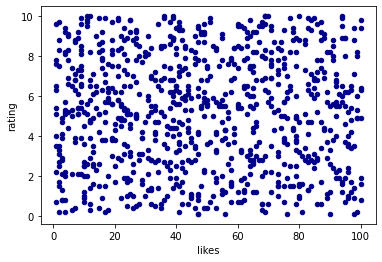

In [200]:
pizza_venues_details.plot.scatter(x='likes',
                      y='rating',
                      c='DarkBlue')

In [201]:
price_cat = pizza_venues_details.groupby('price',  as_index=False).mean()


price_cat

,price,likes,rating
0,1,49.471366,5.082379
1,2,48.480000,5.165500
2,3,47.142857,5.443750
3,4,48.912844,5.033945


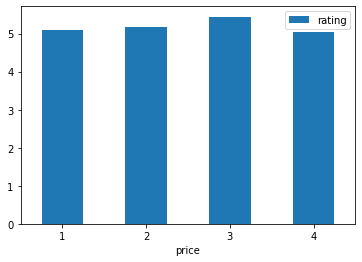

In [202]:
price_cat.plot.bar(x='price', y='rating', rot=0)

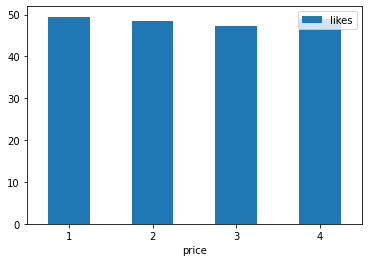

In [203]:
price_cat.plot.bar(x='price', y='likes', rot=0)

In [204]:
pizza_venues_details.describe()

,likes,price,rating
count,869.000000,869.000000,869.000000
mean,48.502877,2.498274,5.182509
std,28.852861,1.129438,2.801311
min,1.000000,1.000000,0.100000
25%,23.000000,1.000000,2.800000
50%,47.000000,3.000000,5.300000
75%,73.000000,4.000000,7.500000
max,100.000000,4.000000,10.000000


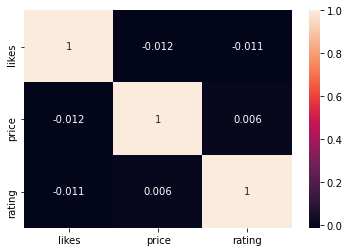

In [205]:
detailsCorr = pizza_venues_details.corr()
sn.heatmap(detailsCorr, annot=True)

plt.show()

In [239]:
body = client_b15569be60ed466c9b15ebf0e9035db8.get_object(Bucket='ibmtest-donotdelete-pr-l1yyerq4ojmik8',Key='pizza_ingredientes_final.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

pizza_ingredients_gb = pd.read_csv(body)
pizza_ingredients_gb.head()

,Restaurant,Baked Ziti Pizza,Bbq Pizza,Blt Pizza,Breakfast Pizza,Broccoli Pizza,Buffalo Pizza,Build your own Pizza,Burger Pizza,California Pizza,...,Sushi Pizza,Taco Pizza,Thai Dye Pizza,The Everything Pizza,Thin Pizza,Traditional Pizza,Veal Pizzaiola,Veggie Pizza,White Pizza,Signature Pizza
0,The Bahche,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Cantina Di Napoli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Toscana,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Cart-driver,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Carvalho's Brazilian Kitchen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [279]:
pizza_venues_details.rename(columns = {'Name': 'Restaurant'}, inplace = True)

pizza_df_c = pizza_venues_details.merge(pizza_ingredients_gb, on='Restaurant')

pizza_df_c.head()

,Restaurant,id,Venue Name,likes,price,rating,Baked Ziti Pizza,Bbq Pizza,Blt Pizza,Breakfast Pizza,...,Sushi Pizza,Taco Pizza,Thai Dye Pizza,The Everything Pizza,Thin Pizza,Traditional Pizza,Veal Pizzaiola,Veggie Pizza,White Pizza,Signature Pizza
0,'l Bistro,4b4decbbf964a52036db26e3,'L Bistro,42,4,5.9,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Abo's Pizza,4bb9f246935e9521d8862790,Deli Zone/Abo's Pizza,56,1,0.1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,Abyssinia Chinese,4b78bd74f964a5203ee02ee3,Abyssinia Cafe,20,3,1.7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Acapulco Mexican Restaurant,4bf9dc7f5efe2d7fd9f56c34,Acapulco Mexican Restaurant,92,2,6.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Ace's Pizza,4bb0f25df964a520e06c3ce3,Ace's Pizza,58,1,1.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [288]:
#pizza_df_c = pizza_df_c.drop(['id', 'Venue Name'], axis=1)
#pizza_df_c = pizza_df_c.drop(['id', 'Venue Name', 'price','rating', 'likes'], axis=1)
pizza_df_c = pizza_venues_details.drop(['id', 'Venue Name'], axis = 1)

pizza_df_c

,Restaurant,likes,price,rating
0,'l Bistro,42,4,5.9
1,24 Hour Express Locksmith Inc,7,2,6.3
2,7 Day 24 Hours Emergency Locks,9,4,9.6
3,Abo's Pizza,56,1,0.1
4,Abyssinia Chinese,20,3,1.7
...,...,...,...,...
864,Zimorino's Red Pies Over Montana,56,4,4.3
865,Zios Italian Kitchen - Olathe,43,4,6.0
866,Zoës Kitchen,55,1,7.8
867,Zo��s Kitchen,33,1,5.5


In [289]:
from sklearn.preprocessing import StandardScaler

X = pizza_df_c.values[:,1:]
X = np.nan_to_num(X)
cluster_pizzas = StandardScaler().fit_transform(X)

cluster_pizzas

array([[-0.22551045,  1.3303879 ,  0.25627449],
       [-1.43926028, -0.44142373,  0.399147  ],
       [-1.36990314,  1.3303879 ,  1.57784524],
       ...,
       [ 0.22531092, -1.32732954,  0.93491893],
       [-0.53761755, -1.32732954,  0.11340198],
       [ 1.26566791,  0.44448209,  1.68499963]])

In [290]:
num_clusters = 5

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_pizzas)
labels = k_means.labels_

print(labels)

[4 3 3 0 4 2 0 2 0 0 3 2 2 1 3 1 2 2 0 1 3 3 1 2 0 4 0 4 4 4 4 2 3 1 2 1 0
 4 2 2 2 4 0 3 3 0 3 4 0 4 2 2 4 2 0 1 2 1 3 4 3 4 4 1 0 2 4 2 0 2 2 0 0 1
 3 2 3 0 1 1 2 2 0 3 2 0 4 0 3 3 1 1 2 1 0 3 4 1 4 0 2 1 3 0 3 0 4 0 2 3 2
 1 3 1 3 2 1 2 0 4 3 0 3 3 0 0 4 0 0 1 0 3 3 0 3 1 3 3 2 0 0 4 3 3 4 2 0 1
 3 2 0 1 3 2 2 1 0 3 0 4 1 3 1 1 2 0 3 4 1 4 3 0 4 3 0 0 1 3 0 0 3 4 0 0 3
 4 3 2 3 3 3 0 2 1 3 1 1 3 2 2 2 0 2 1 4 3 2 0 4 1 1 0 0 3 4 1 3 3 4 1 1 0
 0 4 3 4 4 1 0 4 0 1 2 3 2 0 0 1 2 2 3 0 4 3 3 1 1 4 0 3 0 4 1 4 3 1 3 0 0
 1 0 0 1 2 4 4 0 2 2 1 0 3 4 3 1 4 2 3 0 1 0 4 4 0 3 2 3 3 2 2 3 4 0 2 2 1
 1 4 4 2 2 2 3 2 3 4 3 4 4 0 3 0 3 2 4 0 2 1 4 2 1 0 0 0 0 3 1 1 2 4 4 3 2
 1 1 3 2 3 3 2 4 0 4 4 1 2 2 4 4 2 0 1 3 2 1 3 0 1 1 3 0 4 1 1 2 3 3 3 4 4
 3 3 1 0 4 2 2 2 3 3 2 4 0 3 1 0 2 2 4 3 1 1 3 2 1 1 2 0 2 4 1 2 1 3 4 0 0
 3 3 1 0 1 2 2 2 0 3 4 2 4 0 1 2 3 0 2 3 2 0 2 1 1 2 2 3 1 1 0 3 4 3 0 4 0
 3 0 3 4 3 1 1 1 3 3 1 2 2 4 4 3 3 1 1 4 1 0 4 4 1 3 1 4 1 1 1 3 1 0 2 0 0
 3 3 0 1 0 1 3 2 3 3 3 4 

In [291]:
pizza_df_c["Labels"] = labels

pizza_df_c

,Restaurant,likes,price,rating,Labels
0,'l Bistro,42,4,5.9,4
1,24 Hour Express Locksmith Inc,7,2,6.3,3
2,7 Day 24 Hours Emergency Locks,9,4,9.6,3
3,Abo's Pizza,56,1,0.1,0
4,Abyssinia Chinese,20,3,1.7,4
...,...,...,...,...,...
864,Zimorino's Red Pies Over Montana,56,4,4.3,1
865,Zios Italian Kitchen - Olathe,43,4,6.0,3
866,Zoës Kitchen,55,1,7.8,2
867,Zo��s Kitchen,33,1,5.5,0


In [292]:
pizza_cluster_labels = pizza_df_c.groupby('Labels', as_index = False).mean()
pizza_cluster_labels

,Labels,likes,price,rating
0,0,33.057895,1.368421,3.177368
1,1,80.212291,3.195531,3.612849
2,2,73.436709,1.563291,7.471519
3,3,31.282927,2.960976,7.966341
4,4,25.503650,3.540146,3.208759


In [293]:
pizza_df_c['Labels'].value_counts()

3    205
0    190
1    179
2    158
4    137
Name: Labels, dtype: int64

In [285]:
import seaborn as sns

sns.catplot(x="Veggie Pizza", y="rating", hue="Labels", data=pizza_df_c)


ValueError: Could not interpret input 'rating'

In [272]:
cluster_0 = pizza_cluster_labels.loc[pizza_cluster_labels['Labels']==0]

cluster_0

,Labels,likes,price,rating,Baked Ziti Pizza,Bbq Pizza,Blt Pizza,Breakfast Pizza,Broccoli Pizza,Buffalo Pizza,...,Sushi Pizza,Taco Pizza,Thai Dye Pizza,The Everything Pizza,Thin Pizza,Traditional Pizza,Veal Pizzaiola,Veggie Pizza,White Pizza,Signature Pizza
0,0,47.835705,2.489004,5.165977,0.0,0.033635,0.005175,0.018111,0.002587,0.028461,...,0.012937,0.029754,0.0,0.0,0.021992,0.080207,0.003881,0.071151,0.085382,0.117723


0    likes
dtype: object

In [273]:
cluster_0 = pd.melt(cluster_0, id_vars='Labels')

cluster_0

,Labels,variable,value
0,0,likes,47.835705
1,0,price,2.489004
2,0,rating,5.165977
3,0,Baked Ziti Pizza,0.000000
4,0,Bbq Pizza,0.033635
...,...,...,...
81,0,Traditional Pizza,0.080207
82,0,Veal Pizzaiola,0.003881
83,0,Veggie Pizza,0.071151
84,0,White Pizza,0.085382


In [277]:
cluster_0 = cluster_0.sort_values(by = 'value')
cluster_0.tail(10)

,Labels,variable,value
40,0,Pepperoni Pizza,0.063389
83,0,Veggie Pizza,0.071151
81,0,Traditional Pizza,0.080207
84,0,White Pizza,0.085382
31,0,Margherita Pizza,0.116429
85,0,Signature Pizza,0.117723
13,0,Cheese Pizza,0.179819
1,0,price,2.489004
2,0,rating,5.165977
0,0,likes,47.835705
